In [1]:
%load_ext watermark
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML

import time

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import scipy.stats as scs
from scipy.stats import multivariate_normal as mvn
import sklearn.mixture as mix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%watermark

2017-11-08T23:05:40+05:30

CPython 3.5.2
IPython 6.2.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.10.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
data=pd.read_csv('../DATA/student-por.csv')

from sklearn.preprocessing import LabelEncoder
var_mod = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','guardian', 'schoolsup','paid','reason','famsup','activities','nursery','higher', 'internet', 'romantic']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
for i in var_mod:
    data[i] = le.fit_transform(data[i])

if 'new' not in data:
    data.insert(33,'new',0)

for i in range(0,len(data)):
    data.loc[data['G3'] <= 7, 'new'] = 0
    data.loc[(data['G3']>7) & (data['G3']<=14) , 'new'] = 1
    data.loc[data['G3'] >14, 'new'] = 2

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,new
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1
5,0,1,16,1,1,1,4,3,3,2,...,4,2,1,2,5,6,12,12,13,1
6,0,1,16,1,1,1,2,2,2,2,...,4,4,1,1,3,0,13,12,13,1
7,0,0,17,1,0,0,4,4,2,4,...,1,4,1,1,1,2,10,13,13,1
8,0,1,15,1,1,0,3,2,3,2,...,2,2,1,1,1,0,15,16,17,2
9,0,1,15,1,0,1,3,4,2,2,...,5,1,1,1,5,0,12,12,13,1


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
f = data[['age','absences']]

In [6]:
f

,age,absences
0,18,4
1,17,2
2,15,6
3,15,0
4,16,0
5,16,6
6,16,0
7,17,2
8,15,0
9,15,0


In [7]:
type(f)

pandas.core.frame.DataFrame

In [8]:
# Code sourced from:
#    http://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html

def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n, p = xs.shape
    k = len(pis)

    ll_old = 0
    for i in range(max_iter):
        print('\nIteration: ', i)
        print()
        exp_A = []
        exp_B = []
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(len(mus)):
            for i in range(n):
                ws[j, i] = pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
        ws /= ws.sum(0)

        # M-step
        pis = np.zeros(k)
        for j in range(len(mus)):
            for i in range(n):
                pis[j] += ws[j, i]
        pis /= n

        mus = np.zeros((k, p))
        for j in range(k):
            for i in range(n):
                mus[j] += ws[j, i] * xs[i]
            mus[j] /= ws[j, :].sum()
        
        sigmas = np.zeros((k, p, p))
        for j in range(k):
            for i in range(n):
                ys = np.reshape(xs[i]- mus[j], (2,1))
                sigmas[j] += ws[j, i] * np.dot(ys, ys.T)
            sigmas[j] /= ws[j,:].sum()

        new_mus = (np.diag(mus)[0], np.diag(mus)[1])
        new_sigs = (np.unique(np.diag(sigmas[0]))[0], np.unique(np.diag(sigmas[1]))[0])
        df = (pd.DataFrame(index=[1, 2]).assign(mus = new_mus).assign(sigs = new_sigs))
        
        xx = np.linspace(0, 100, 100)
        yy = scs.multivariate_normal.pdf(xx, mean=new_mus[0], cov=new_sigs[0])
        mu='$\mu_1$:'
        colors = sns.color_palette('Dark2', 3)
        fig, ax = plt.subplots(figsize=(9, 7))
        ax.set_ylim(-0.001, np.max(yy))
        ax.plot(xx, yy, color=colors[1])
        ax.axvline(new_mus[0], ymin=0., color=colors[1])
        ax.fill_between(xx, 0, yy, alpha=0.5, color=colors[1])
        lo, hi = ax.get_ylim()
        ax.annotate(mu+'new_mus[0]', fontsize=12, 
                    fontweight='demi', xy=(new_mus[0], (hi-lo)/2), 
                    xycoords='data', xytext=(80, (hi-lo)/2), 
                    arrowprops=dict(facecolor='black', connectionstyle='arc3,rad=0.2', 
                                    shrink=0.05))
        ax.fill_between(xx, 0, yy, alpha=0.5, color=colors[2])
        
        yy2 = scs.multivariate_normal.pdf(xx, mean=new_mus[1], cov=new_sigs[1])
        
        ax.plot(xx, yy2, color=colors[2])
        ax.axvline(new_mus[1], ymin=0., color=colors[2])
        lo, hi = ax.get_ylim()
        ax.annotate(mu+'new_mus[0]', 
                    fontsize=12, fontweight='demi',
            xy=(new_mus[1], (hi-lo) / 2), xycoords='data', xytext=(25, (hi-lo) / 2),
            arrowprops=dict(facecolor='black', connectionstyle="arc3,rad=0.2",shrink=0.05))
        ax.fill_between(xx, 0, yy2, alpha=0.5, color=colors[2])
        
        dot_kwds = dict(markerfacecolor='white', markeredgecolor='black', markeredgewidth=1, markersize=10)
        ax.plot(height, len(height)*[0], 'o', **dot_kwds)
        ax.set_ylim(-0.001, np.max(yy2))
        
        
        print(df.T)   
        
        # update complete log likelihoood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * mvn(mus[j], sigmas[j]).pdf(xs[i])
            ll_new += np.log(s)
        print('log_likelihood: {ll_new:3.4f}')
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new
        
    return ll_new, pis, mus, sigmas


Iteration:  0

              1          2
mus   10.404573  10.199036
sigs  68.982191  70.122639
log_likelihood: {ll_new:3.4f}

Iteration:  1

              1          2
mus   10.494102  10.277169
sigs  68.532185  69.847868
log_likelihood: {ll_new:3.4f}

Iteration:  2

              1          2
mus   10.595070  10.365081
sigs  68.043544  69.490634
log_likelihood: {ll_new:3.4f}

Iteration:  3

              1          2
mus   10.709710  10.464789
sigs  67.465449  69.065394
log_likelihood: {ll_new:3.4f}

Iteration:  4

              1          2
mus   10.841245  10.579052
sigs  66.769534  68.553729
log_likelihood: {ll_new:3.4f}

Iteration:  5

              1          2
mus   10.994075  10.711615
sigs  65.917897  67.926903
log_likelihood: {ll_new:3.4f}

Iteration:  6

              1          2
mus   11.174339  10.867687
sigs  64.854557  67.142604
log_likelihood: {ll_new:3.4f}

Iteration:  7

              1          2
mus   11.390871  11.054730
sigs  63.493531  66.136318
log_likelihood

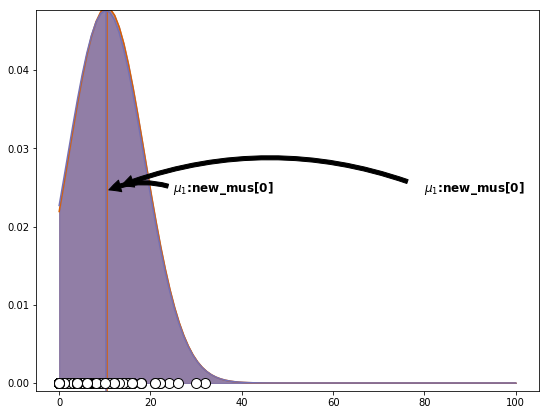

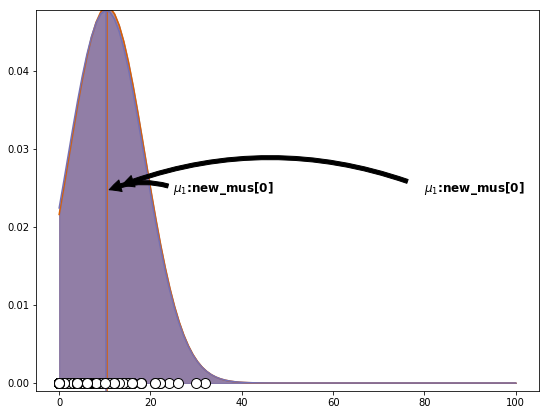

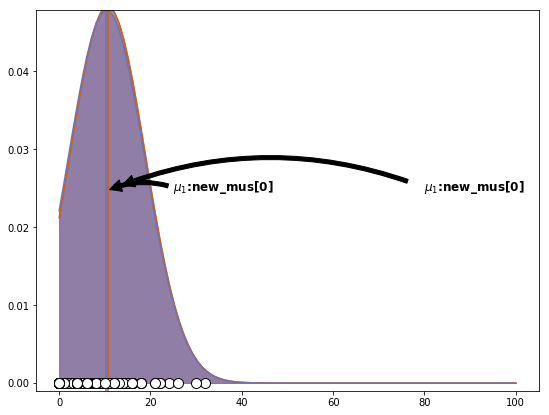

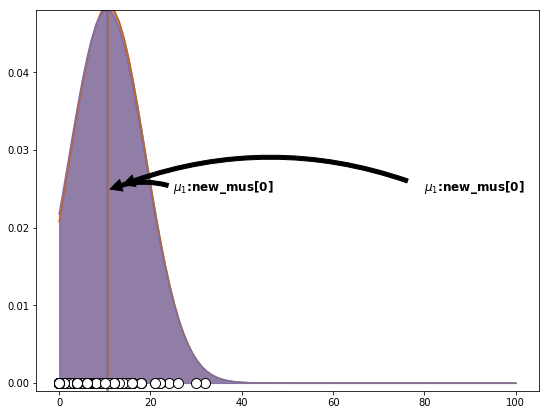

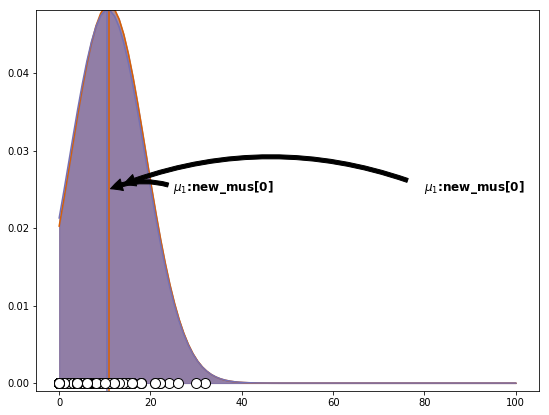

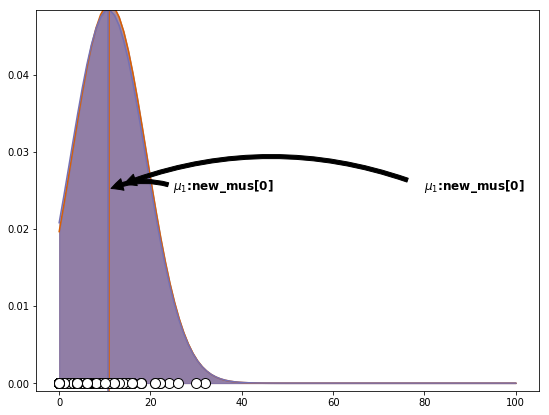

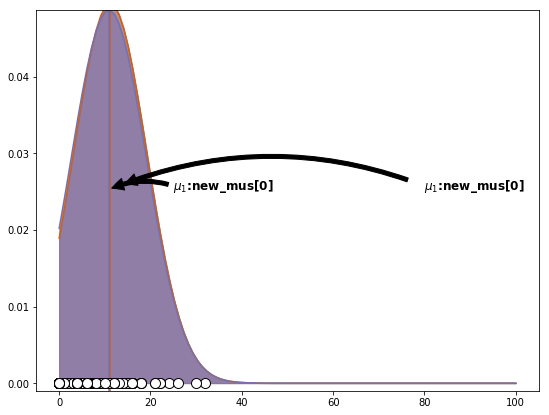

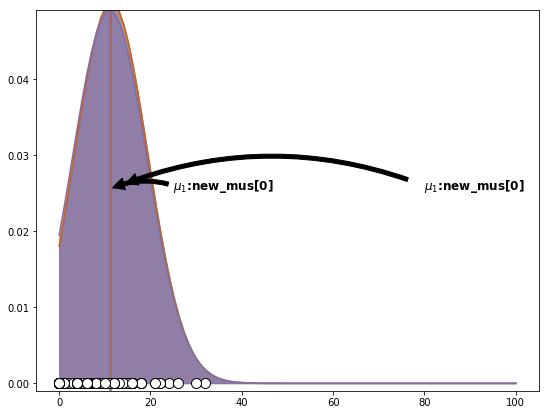

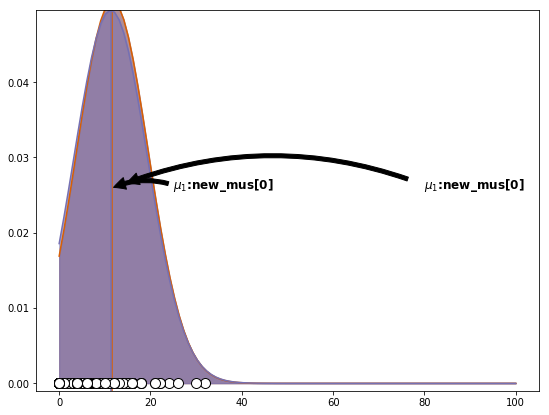

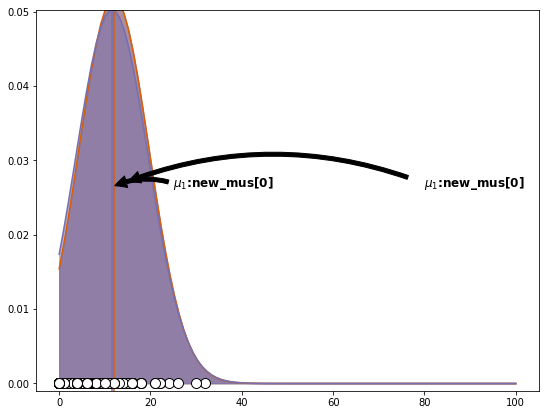

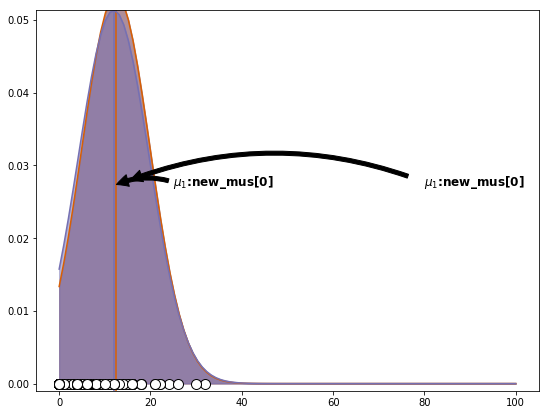

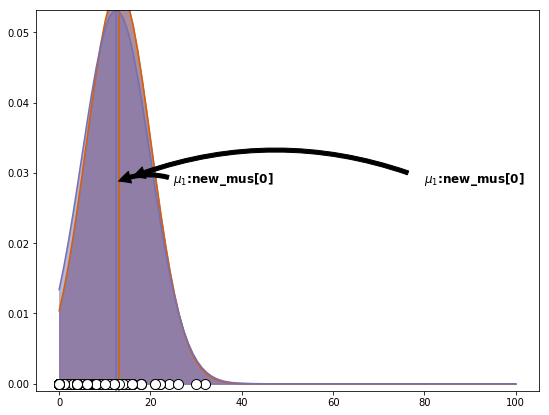

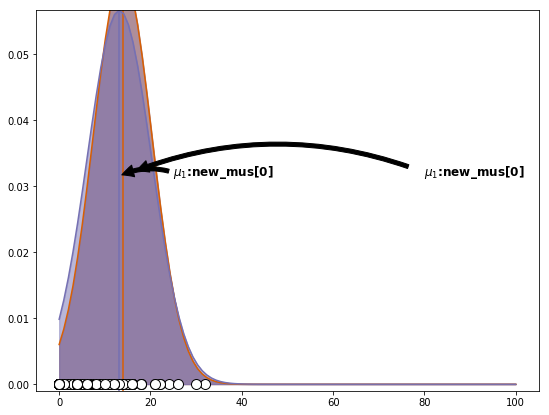

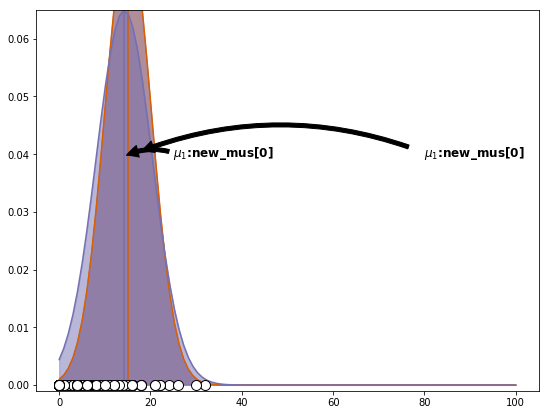

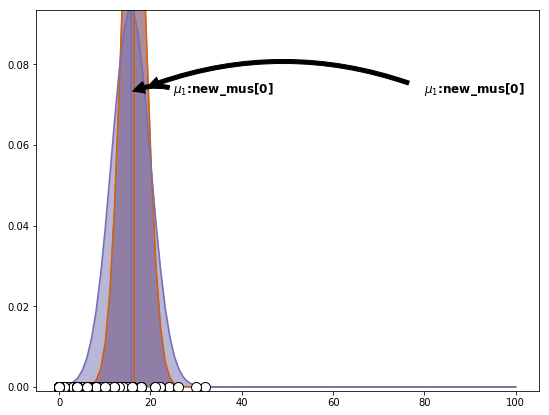

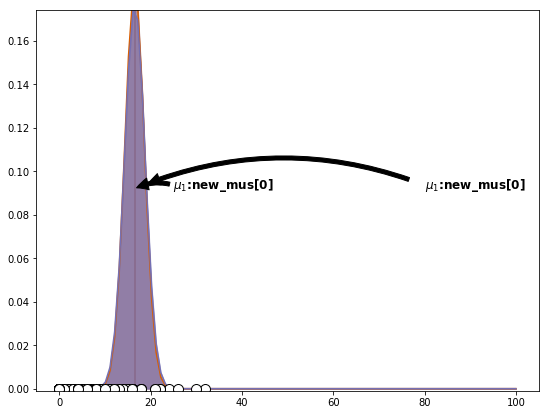

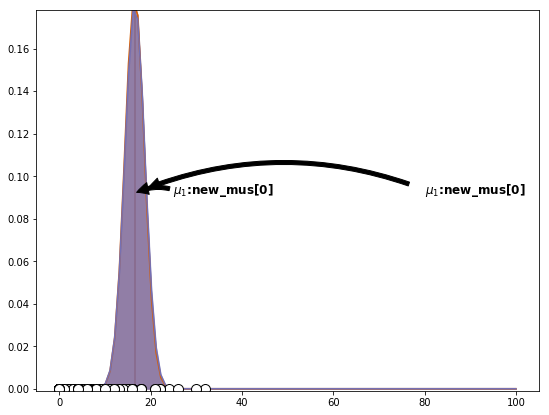

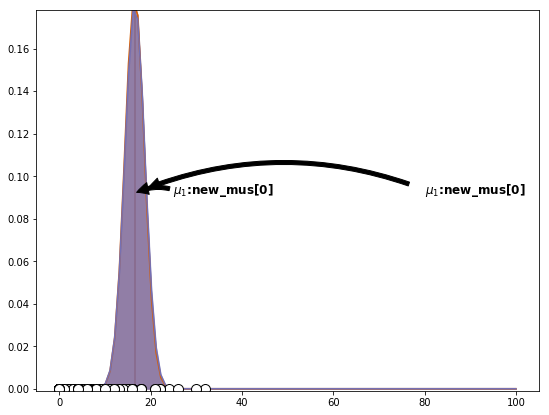

In [9]:
height = f['absences']
n = len(height)

# Ground truthish
_mus = np.array([[0, f.groupby('absences').mean().iat[0, 0]], 
                 [f.groupby('absences').mean().iat[1, 0], 0]])
_sigmas = np.array([[[5, 0], [0, 5]], 
                    [[5, 0],[0, 5]]])
_pis = np.array([0.5, 0.5]) # priors

# initial random guesses for parameters
np.random.seed(0)

pis = np.random.random(2)
pis /= pis.sum()
mus = np.random.random((2,2))
sigmas = np.array([np.eye(2)] * 2) * height.std()

# generate our noisy x values
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

ll, pis, mus, sigmas = em_gmm_orig(xs, pis, mus, sigmas)

# In the below plots the white dots represent the observed heights.

In [11]:
# Let's define some demo variables and make some blobs

# demo variables

k = 4
n_draws = 500
sigma = .7
random_state = 0
dot_size = 50
cmap = 'viridis'

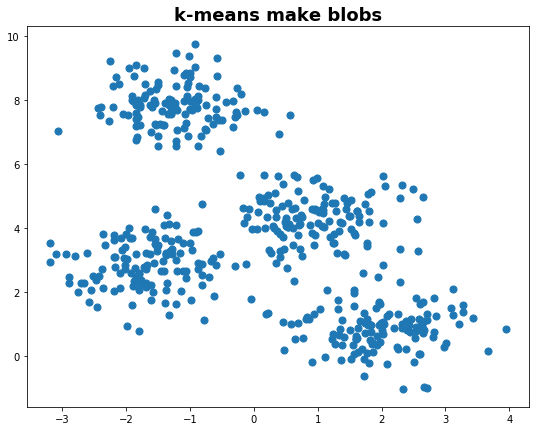

In [12]:
# make blobs

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples = n_draws,
                       centers = k,
                       cluster_std = sigma,
                       random_state = random_state)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], s=dot_size)
plt.title('k-means make blobs', fontsize=18, fontweight='demi')

In [13]:
# sample implementation
# code sourced from: 
#   http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) 
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

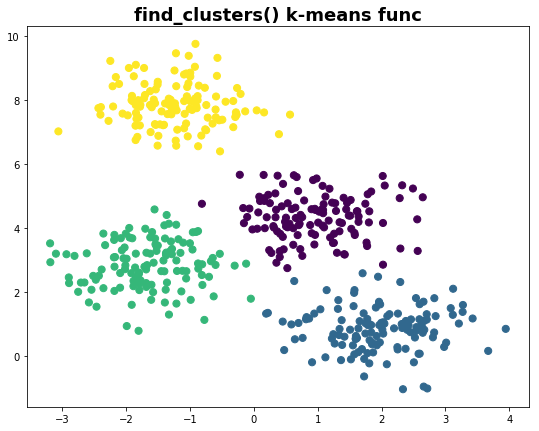

In [14]:
# let's test the implementation

centers, labels = find_clusters(X, k)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap)
plt.title('find_clusters() k-means func', fontsize=18, fontweight='demi')

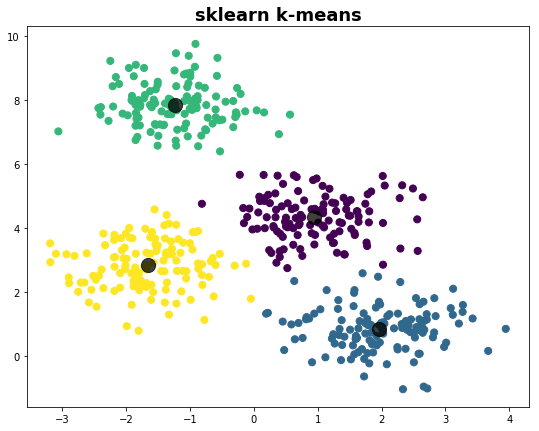

In [15]:
# now let's compare this to the sklearn's KMeans() algorithm

# fit k-means to blobs

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# visualize prediction
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=dot_size, cmap=cmap)

# get centers for plot
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('sklearn k-means', fontsize=18, fontweight='demi')

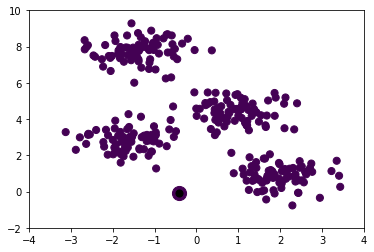

In [16]:
# code sourced from:
#   http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Covariance-Type

from ipywidgets import interact

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
    
    return interact(_kmeans_step, frame=[0, 50],
                    n_clusters=[min_clusters, max_clusters])

plot_kmeans_interactive();

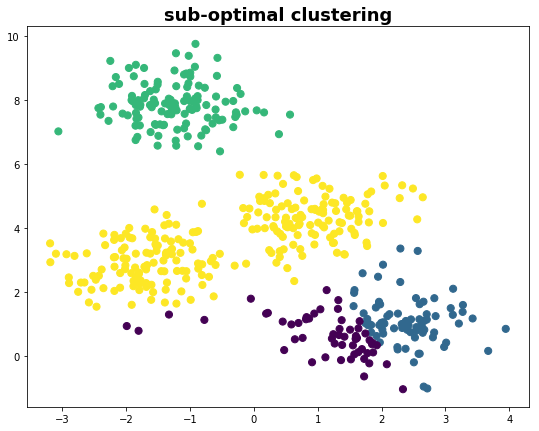

In [17]:
centers, labels = find_clusters(X, k, rseed=11)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('sub-optimal clustering', fontsize=18, fontweight='demi')
ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap)

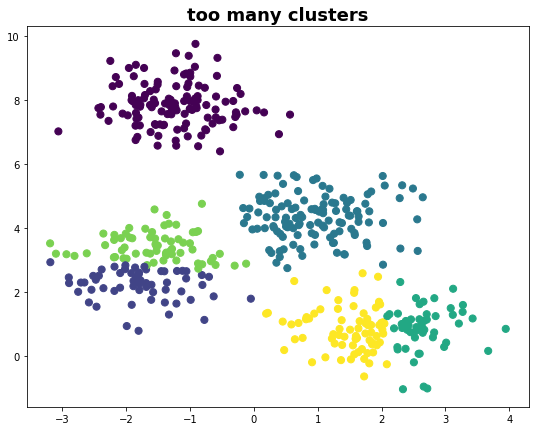

In [18]:
labels6 = KMeans(6, random_state=random_state).fit_predict(X)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('too many clusters', fontsize=18, fontweight='demi')
ax.scatter(X[:, 0], X[:, 1], c=labels6, s=dot_size, cmap=cmap)

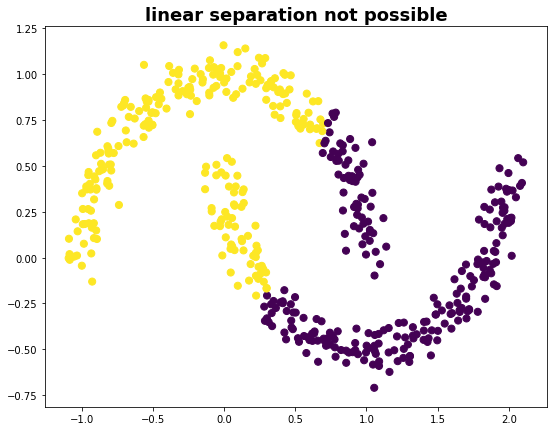

In [19]:
from sklearn.datasets import make_moons

X_mn, y_mn = make_moons(500, noise=.07, random_state=random_state)

labelsM = KMeans(2, random_state=random_state).fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('linear separation not possible', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsM, s=dot_size, cmap=cmap)

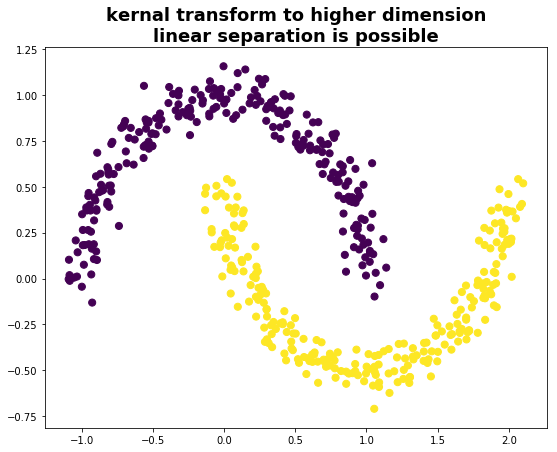

In [20]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')

labelsS = model.fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

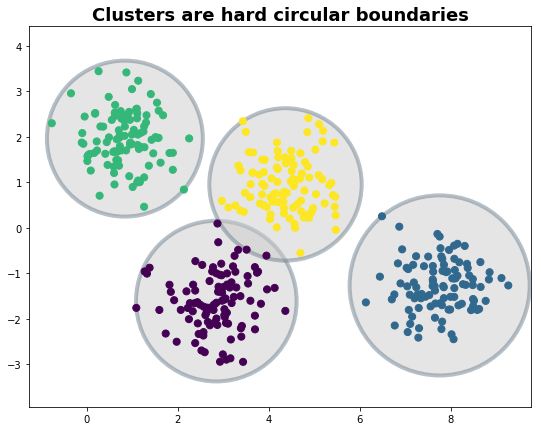

In [21]:
# k-means weaknesses that mixture models address directly
# code sourced from:
#   http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb

from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=k, rseed=2, ax=None):
    labels = kmeans.fit_predict(X)
    
    # plot input data
    #ax = ax or plt.gca() # <-- nice trick
    fig, ax = plt.subplots(figsize=(9,7))    
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)
    
    # plot the representation of Kmeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() 
             for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC',edgecolor='slategrey',
                                lw=4, alpha=0.5, zorder=1))
    return      
                     
X3, y_true = make_blobs(n_samples = 400,
                       centers = k,
                       cluster_std = .6,
                       random_state = random_state)
X3 = X3[:, ::-1] # better plotting

kmeans = KMeans(n_clusters=k, random_state=random_state)
plot_kmeans(kmeans, X3)
plt.title('Clusters are hard circular boundaries', fontsize=18, fontweight='demi')

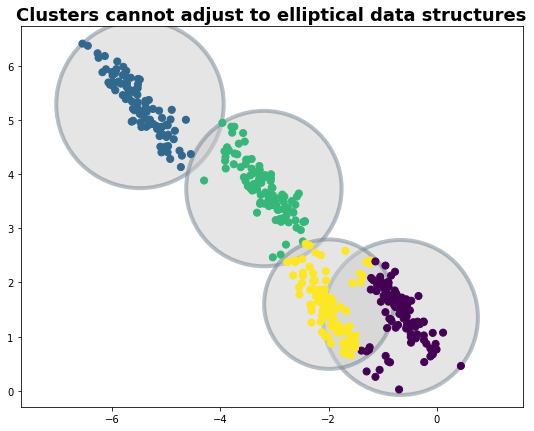

In [22]:
rng = np.random.RandomState(13)
X3_stretched = np.dot(X3, rng.randn(2, 2))

kmeans = KMeans(n_clusters=k, random_state=random_state)
plot_kmeans(kmeans, X3_stretched)
plt.title('Clusters cannot adjust to elliptical data structures',
         fontsize=18, fontweight='demi')

In [24]:
# code sourced from:
#  http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb
from matplotlib.patches import Ellipse 

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
        
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, 
                            angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=w * w_factor)


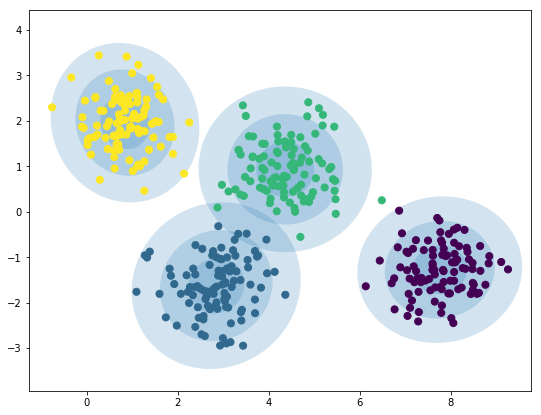

In [25]:
gmm = mix.GaussianMixture(n_components=k, random_state=random_state)
plot_gmm(gmm, X3)

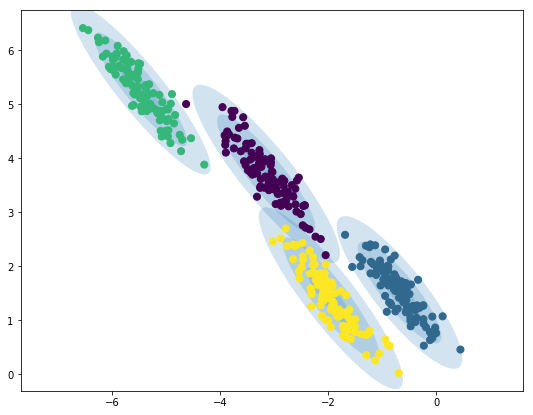

In [26]:
# lets test on the stretched data set

gmm = mix.GaussianMixture(n_components=k, random_state=random_state+1)
plot_gmm(gmm, X3_stretched)

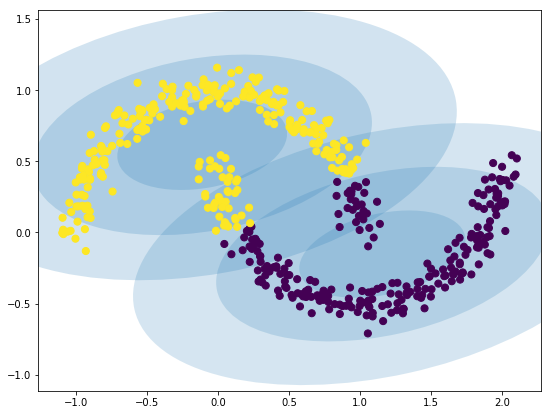

In [27]:
gmm2 = mix.GaussianMixture(n_components=2, covariance_type='full',
                          random_state=random_state)
plot_gmm(gmm2, X_mn)

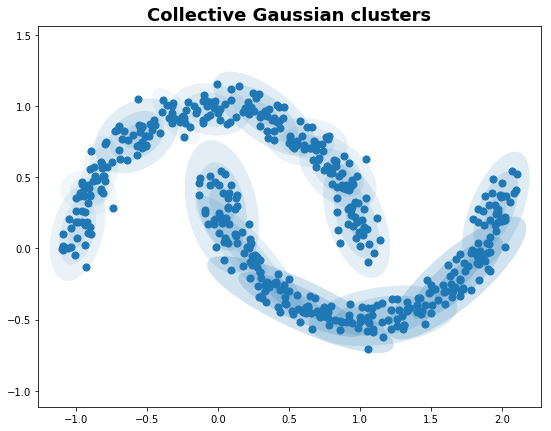

In [28]:
gmm16 = mix.GaussianMixture(n_components=16, covariance_type='full', 
                           random_state=random_state)

plot_gmm(gmm16, X_mn, label=False)
plt.title('Collective Gaussian clusters',
            fontsize=18, fontweight='demi')

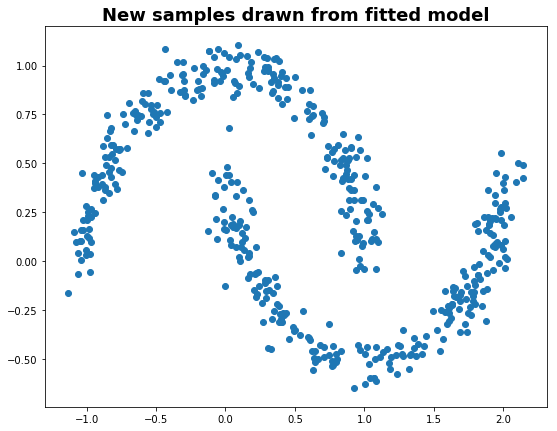

In [29]:
Xnew, ynew = gmm16.sample(500)

fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(Xnew[:, 0], Xnew[:, 1]);
ax.set_title('New samples drawn from fitted model',
            fontsize=18, fontweight='demi')

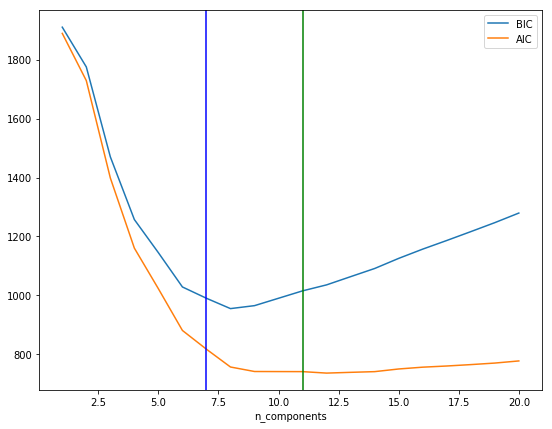

In [30]:
n_components = np.arange(1, 21)
models = [mix.GaussianMixture(n, covariance_type='full',
                             random_state=random_state).fit(X_mn)
         for n in n_components]

fig, ax = plt.subplots(figsize=(9,7))
ax.plot(n_components, [m.bic(X_mn) for m in models], label='BIC')
ax.plot(n_components, [m.aic(X_mn) for m in models], label='AIC')
ax.axvline(np.argmin([m.bic(X_mn) for m in models]), color='blue')
ax.axvline(np.argmin([m.aic(X_mn) for m in models]), color='green')

plt.legend(loc='best')
plt.xlabel('n_components')